In [71]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import matplotlib.markers as mmarkers

matplotlib.rcParams['figure.dpi'] = 400

In [115]:
# plot initialization
bfms = pd.read_csv("./bfm-stats.csv")
font_size = 14
col_order = ["Original", "EVA", "Swin", "MaxViT"]


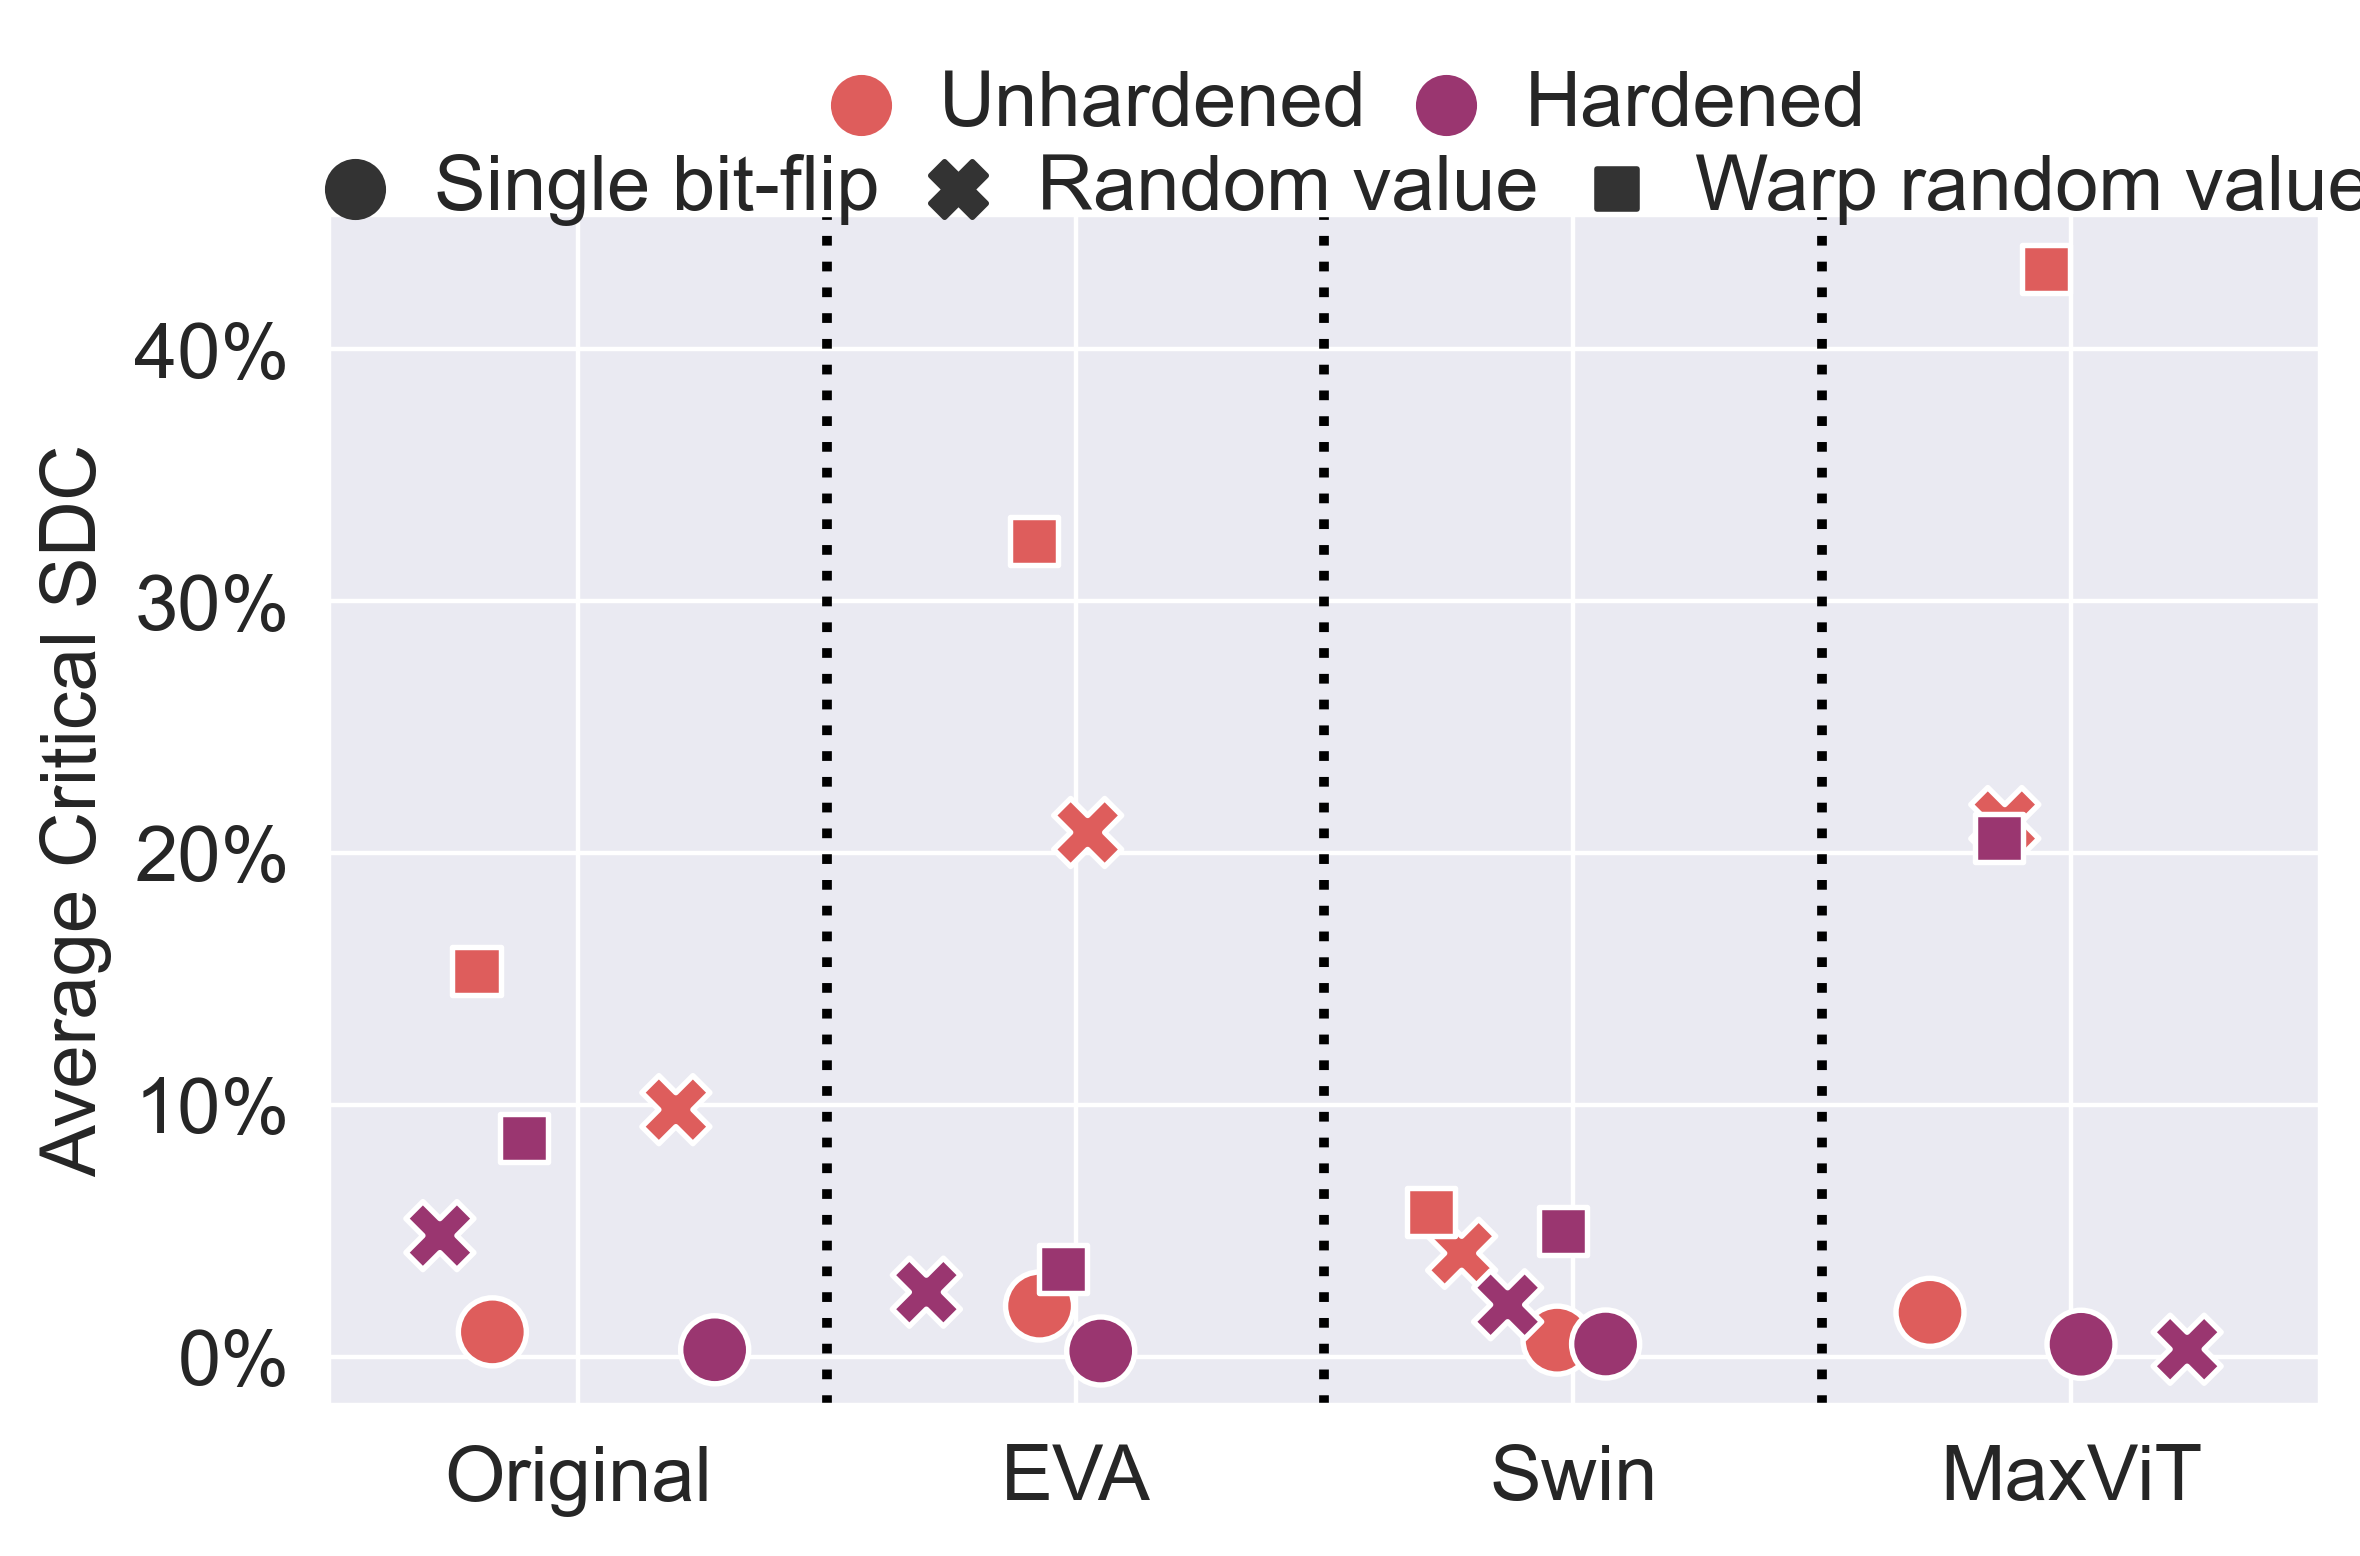

In [150]:
chart = sns.scatterplot(data=bfms, x="Family Model", y="Avg. Critical SDC", style="BFM", hue="Type", palette="flare", s=150,)

# avoid collision between points
for points in chart.collections:
    vertices = points.get_offsets().data
    if len(vertices) > 0:
        vertices[:, 0] += np.random.uniform(-0.3, 0.3, vertices.shape[0])
        points.set_offsets(vertices)

# setting axis labels
chart.set(xlabel=None)
chart.set_ylabel(ylabel="Average Critical SDC", fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xticks(fontsize=font_size)

# legend management
handles, labels = chart.get_legend_handles_labels()
handles_type = handles[1:3]
handles_bfm = handles[4:]

for hd in handles_type:
    hd.set_label("Hardened" if "H." == hd.get_label() else "Unhardened")

bfms_lgd = plt.legend(handles=handles_bfm, loc="upper center", bbox_to_anchor=(.50,1.11), ncols=len(handles_bfm), frameon=False,
                      fontsize=font_size, columnspacing=0.01, handletextpad=0.01)
for lg_hd in bfms_lgd.legendHandles:
    lg_hd._sizes = [100]
    
type_lgd = plt.legend(handles=handles_type, loc="upper center", bbox_to_anchor=(.50,1.18), ncols=len(handles_type), frameon=False,
           fontsize=font_size, columnspacing=0.01, handletextpad=0.01)
for lg_hd in type_lgd.legendHandles:
    lg_hd._sizes = [100]

plt.gca().add_artist(bfms_lgd)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y)}%')) 
chart.set_xlim(-0.5, 3.5)

# plotting lines between the categories
plt.axvline(x=.5, color='black', ls=":", lw=1.75)
plt.axvline(x=1.5, color='black', ls=":", lw=1.75)
plt.axvline(x=2.5, color='black', ls=":", lw=1.75)
plt.tight_layout()
# saving the plot

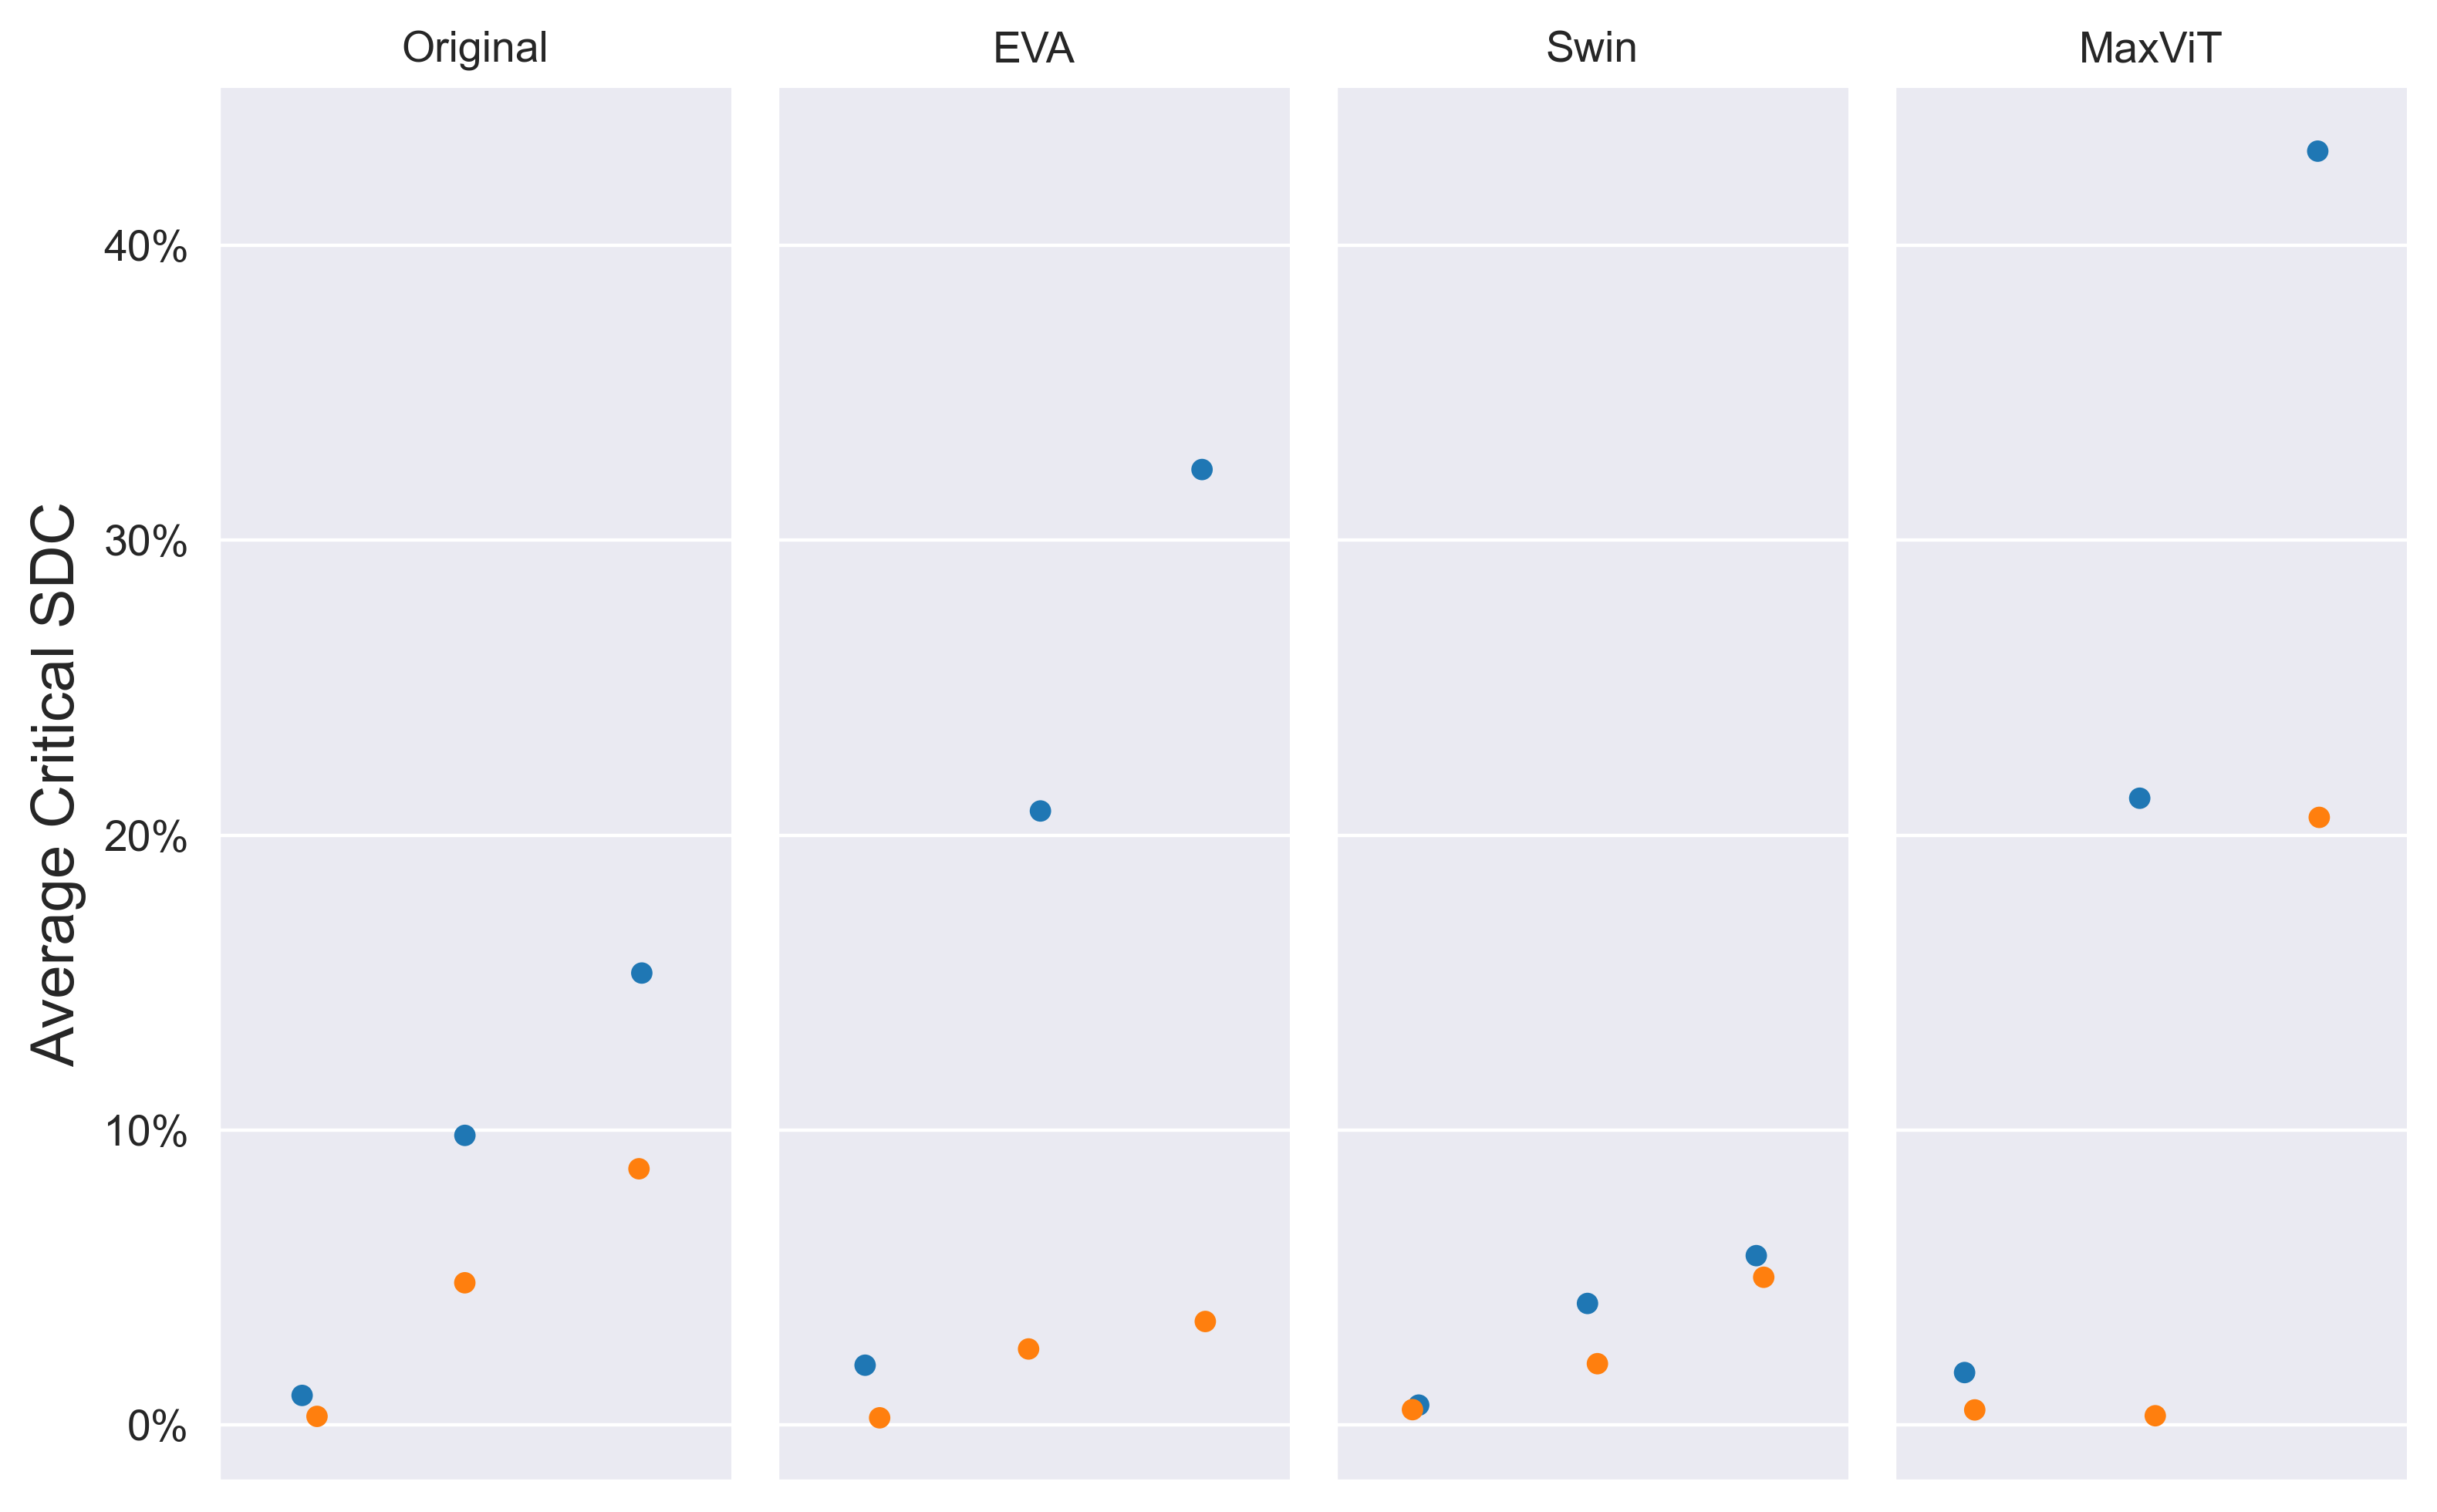

In [151]:
chart = sns.catplot(data=bfms, x="BFM", y="Avg. Critical SDC", hue="Type", col="Family Model", aspect=.4, col_order=col_order, legend=False)

# setting axis labels
chart.set(xlabel=None)
chart.set_titles(col_template='{col_name}')
chart.set_ylabels("Average Critical SDC", fontsize=font_size)
plt.xlabel("")
plt.yticks(fontsize=font_size)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y)}%')) 
plt.xticks([])


plt.tight_layout()
plt.savefig("./avg_crit_sdc_catplot.pdf")

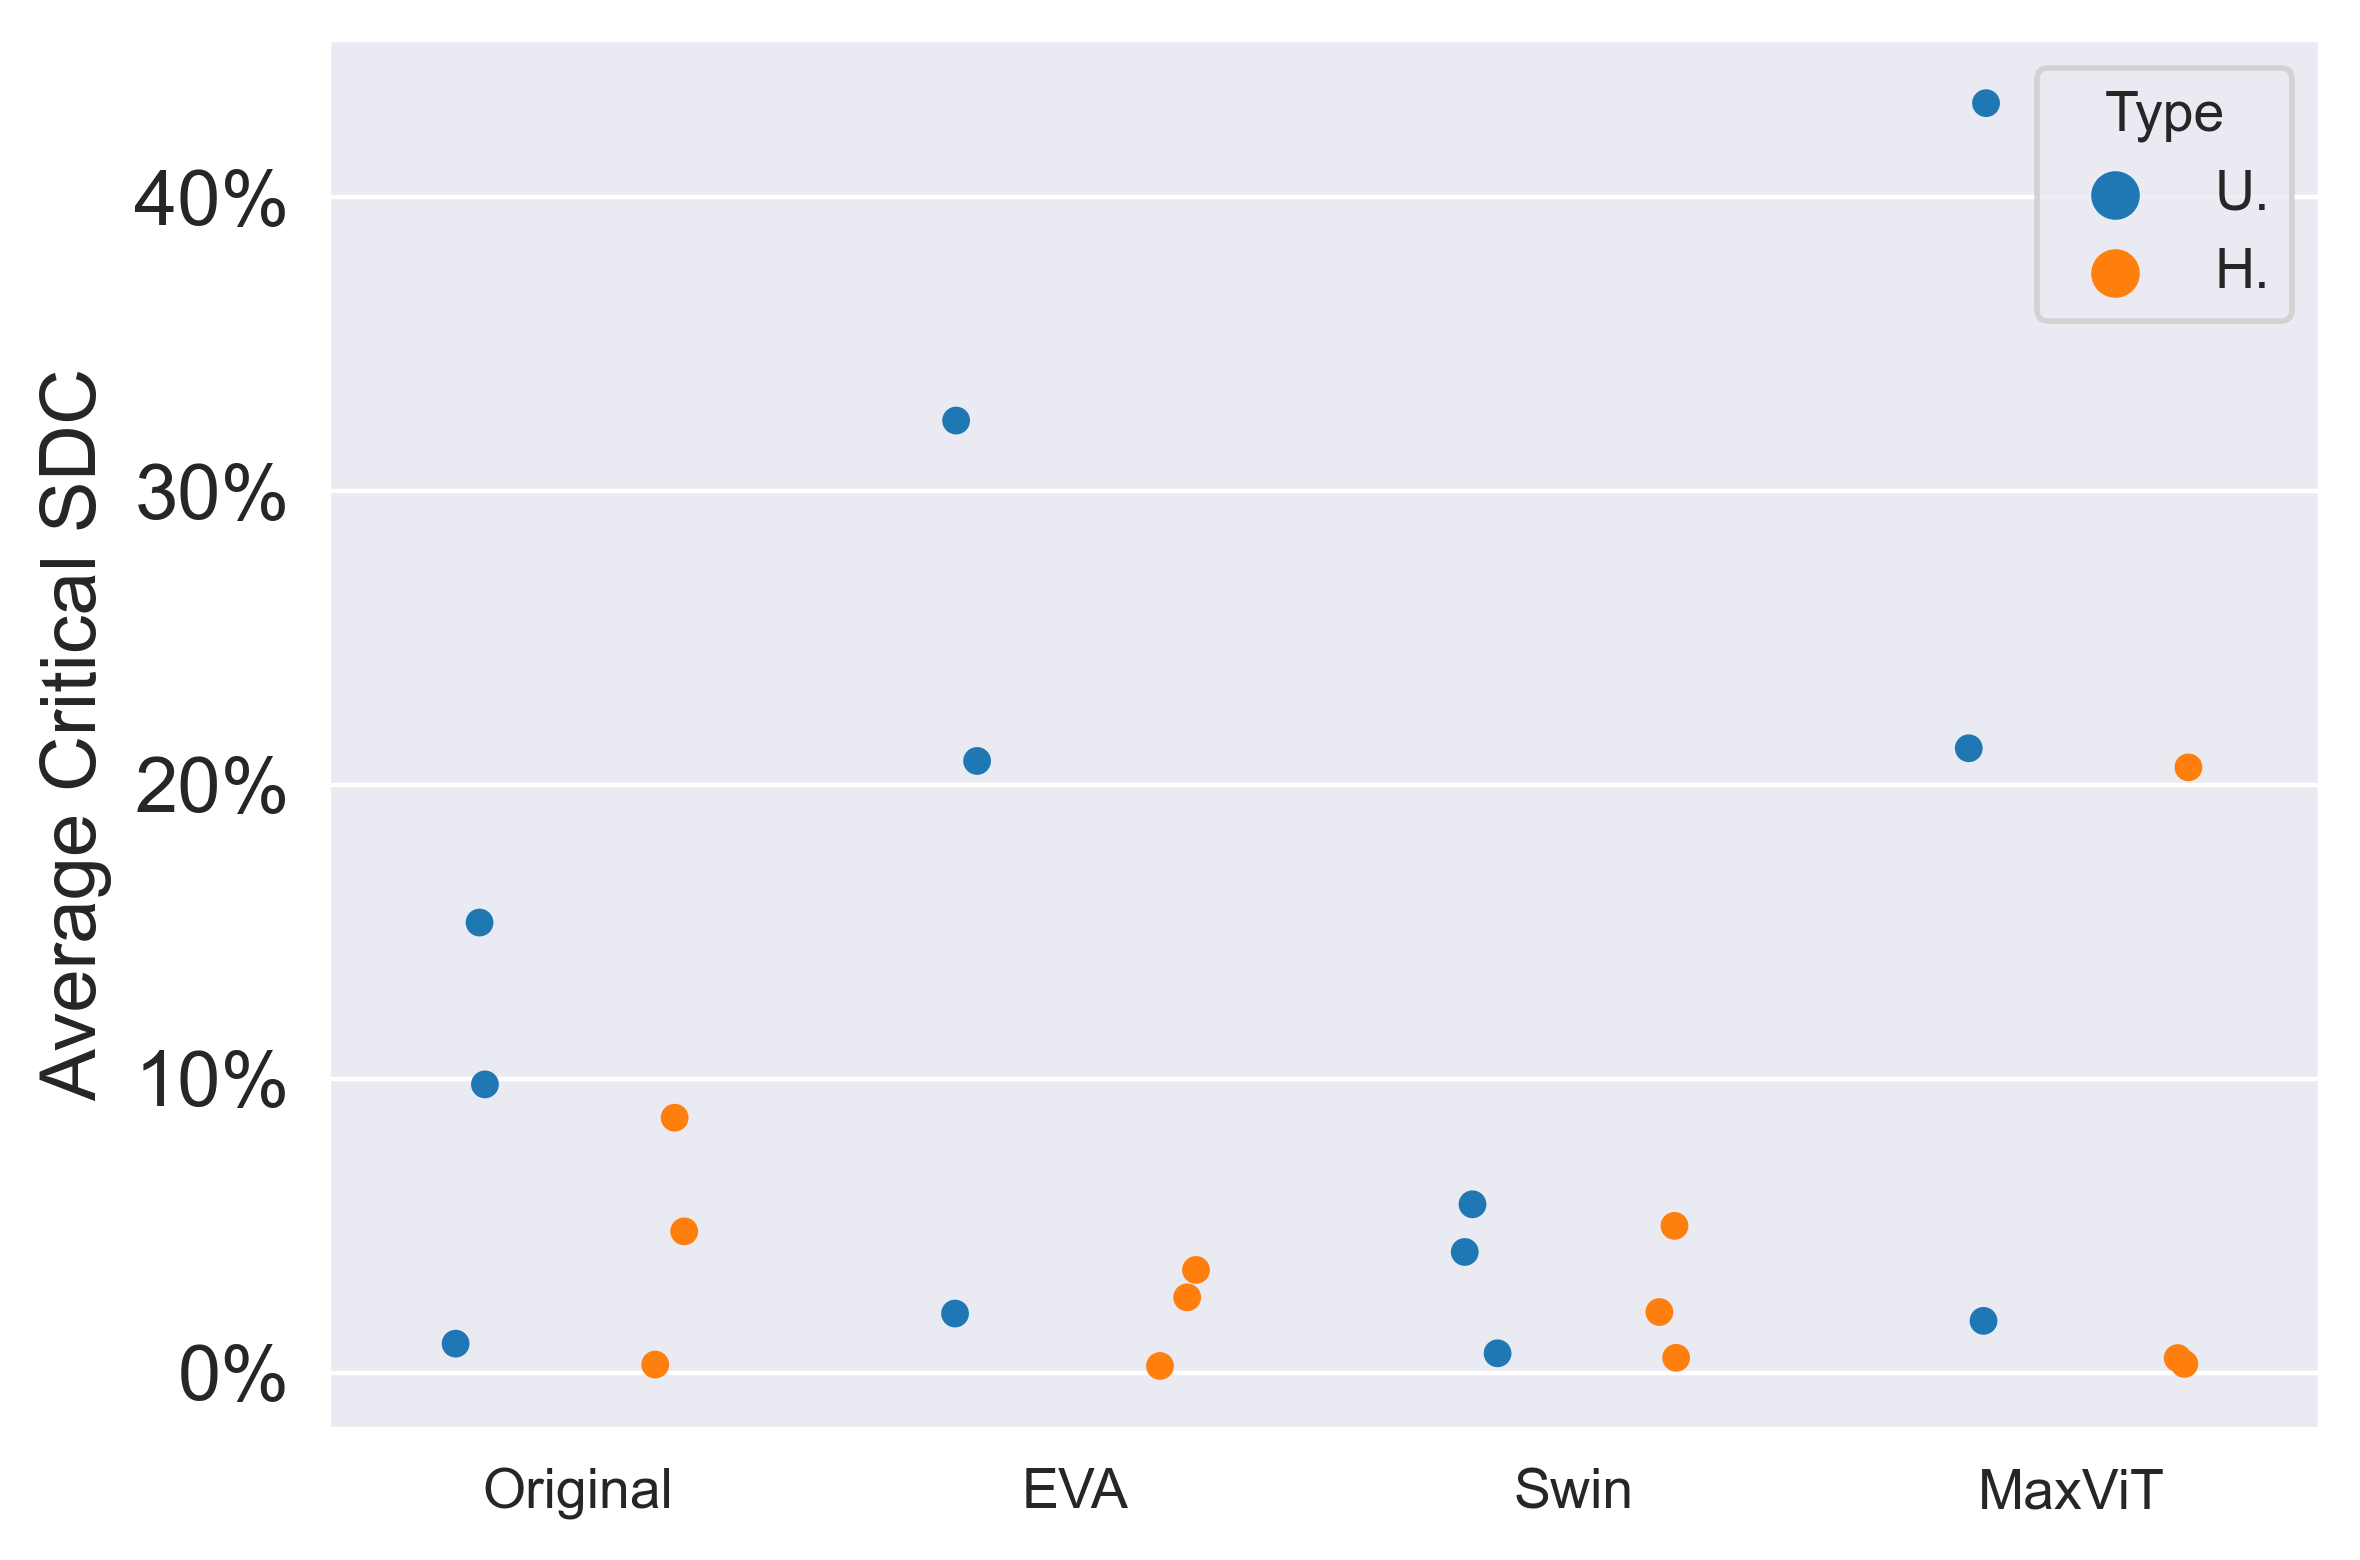

In [152]:
chart = sns.stripplot(data=bfms,  x="Family Model", y="Avg. Critical SDC",  hue="Type", dodge=True, jitter=True)

# setting axis labels
chart.set(xlabel=None)

chart.set_ylabel("Average Critical SDC", fontsize=font_size)
plt.xlabel("")
plt.yticks(fontsize=font_size)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y)}%')) 

plt.tight_layout()
plt.savefig("./avg_crit_sdc_catplot.pdf")

In [164]:
(bfms.set_index(["Family Model", "BFM", "Type"]) / 100).unstack("Type").to_excel("~/git_research/date_2024_vits/data/bfmgraph_tmp.xlsx")